## **수능 Trend Visualization (2)**

### **2. spines**

+ line plot과 bar plot이 네모 상자안에 갇혀 있습니다.
+ 불필요한 spines를 제거해서 시인성을 높여봅니다.

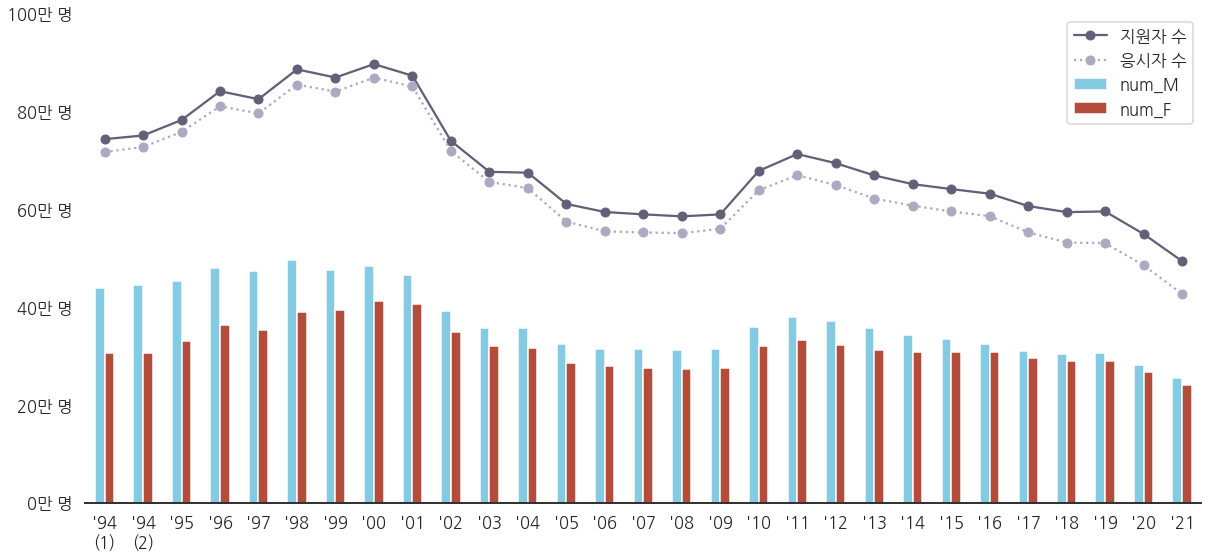

In [24]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M":color_M, "num_F":color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

# xticklabels 수정
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

# xlabels 제거
ax.set_xlabel("")

ax.legend()

# 주변 테두리를 제검
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

### **3. grids**

#### **3.1 y축 grid(major)**

+ `ax.grid()`를 사용해서 넣어줍니다.
+ y축에만 넣을 것이므로 `axis=` `y` 를 붙입니다.

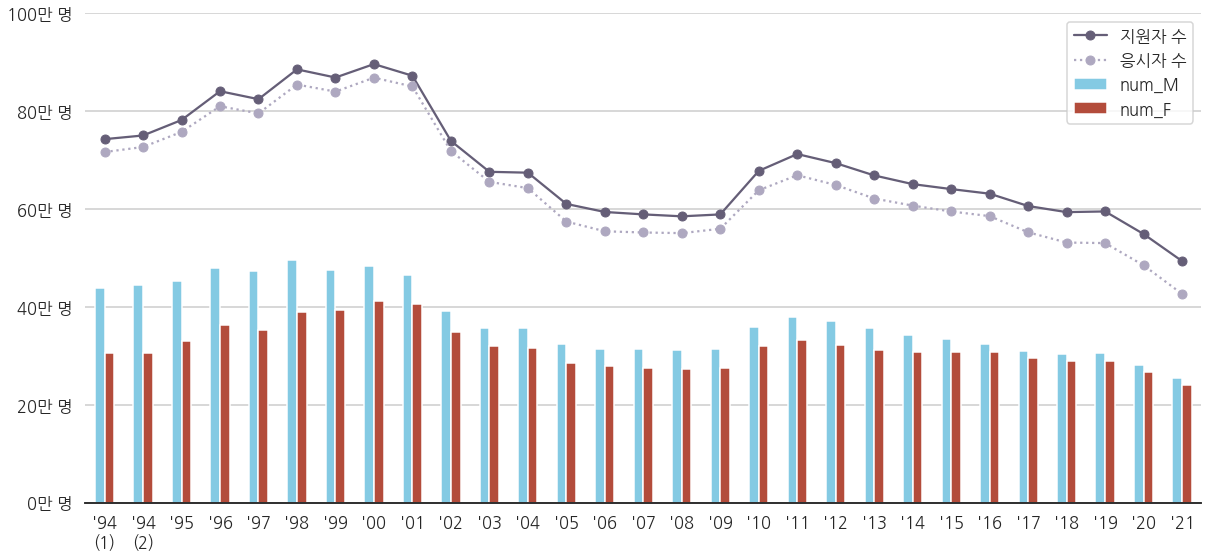

In [25]:
fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M":color_M, "num_F":color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

yticks = ax.get_yticks()
ax.set_yticks(yticks)
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만 명" for y in yticks])

# xticklabels 수정
xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

# xlabels 제거
ax.set_xlabel("")

ax.legend()

# 주변 테두리를 제검
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


# y축 나누기
ax.grid(axis="y") # 기본스타일 = 실선

#### **3.2 y축 grid (minor)**

+ major ticks에만 grid를 그어주니 시원시원한 한편 좀 허전하기도 합니다.
+ minor ticks에도 grid를 그어주고 싶습니다.
+ 아래 코드에 주석으로 설명을 달았습니다.

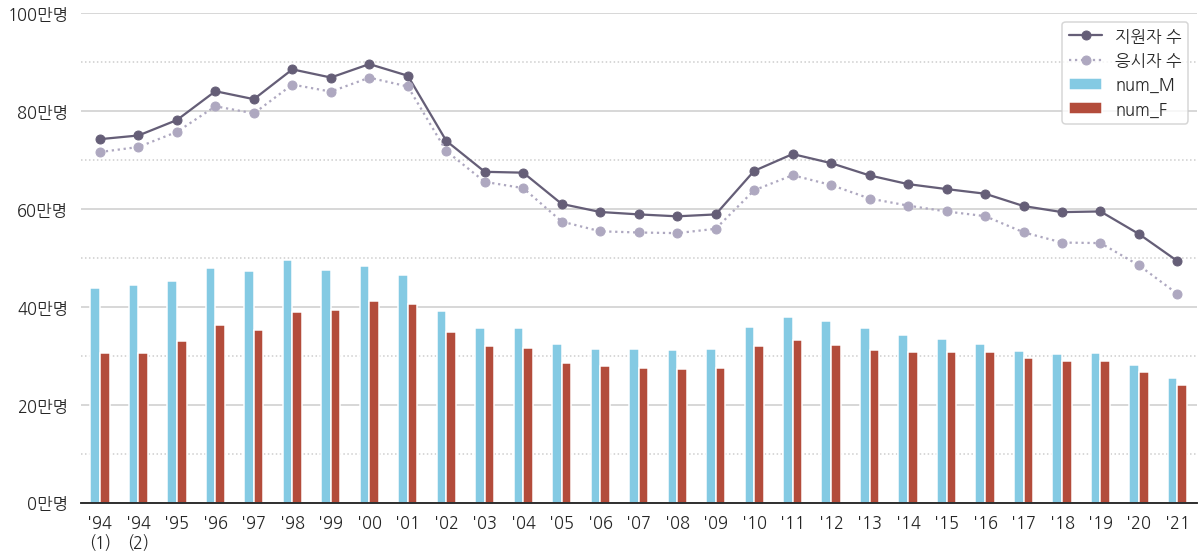

In [26]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

+ major와 minor를 따로 제어하는 것은 다소 성가신 것이 사실입니다.
+ 그래서 저는 웬만하면 **major ticks**만 활용합니다.
+ major ticks로 불충분한 경우에 한해 minor ticks를 활용합시다.

### **4. 범례 `legend`**

+ 우리는 회차별 **남녀 지원자 수**와 **총 지원자,응시자**를 그렸습니다.
+ 그런데 legend에 **num_M,num_F**로만 나와있네요.
+ 대강 남녀 숫자겠지 짐작은 하겠지만 확실하게 알려줘야 합니다.

#### **4.1 범례 고치기**

+ legend는 은근히 손을 대기 어려운 부분입니다.
+ 데이터로 통제할 수 있는 부분도 아니고, **그림**과 **글자, 데이터를 가리키는 부분**이 포함되어 있기 때문입니다.
+ legend 통제의 기본은 **표기될 요소(handles)**와 **표기될 이름(labels)** 제어입니다.
+ plot을 하면서 넣은 `label=`가 `legend()` 명령으로 그림에 가서 붙습니다.
+ 그림에 붙은 legend를 다시 끄집어내는 명령은 `get_legend_handles_labels()` 입니다.

In [27]:
handles, labels = ax.get_legend_handles_labels()
print(f"# handles = {handles}")
print(f"# labels = {labels}")

# handles = [<matplotlib.lines.Line2D object at 0x000002146C35FA00>, <matplotlib.lines.Line2D object at 0x000002146CC05100>, <BarContainer object of 29 artists>, <BarContainer object of 29 artists>]
# labels = ['지원자 수', '응시자 수', 'num_M', 'num_F']


#### **4.1.1 범례 고치기(1):["num_M,num_F"] → ["남성","여성"]**

+ handles에는 **Line2D object**가 두 개, **BarContainer가 두 개** 있습니다.
+ labels에 나온 것 처럼, 각기 **지원자와 응시자, 남성과 여성 지원자 수**입니다.
+ 그렇다면 labels만 고쳐서 넣어주면 될 겁니다.

In [28]:
labels = labels[:2] + ["남성", "여성"]
print(f"# labels = {labels}")

# labels = ['지원자 수', '응시자 수', '남성', '여성']


+ 변경된 레이블을 반영할 차례입니다.
+ 지난번 코드에서 마지막 부분 `ax.legend()` 만 수정합니다.

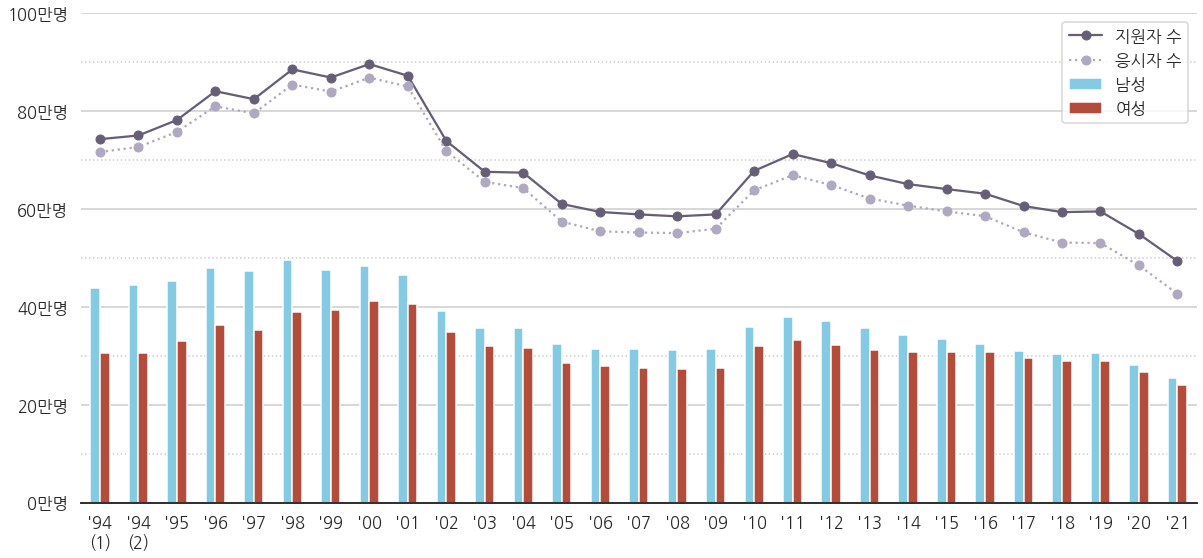

In [29]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"]
ax.legend(handles=handles, labels=labels)

#### **4.1.2 범례 고치기(2): 1열 → 2열**

+ 남성과 여성으로 놓은 건 좋지만 성격이 다른 두 가지가 한데 모여서 보기 좋지 않습니다.
+ **지원자와 응시자, 남성과 여성**을 다른 열로 만들어주고 싶습니다.
+ `ax.legend()`에 `ncols=2`로 지정함으로써 가능합니다.

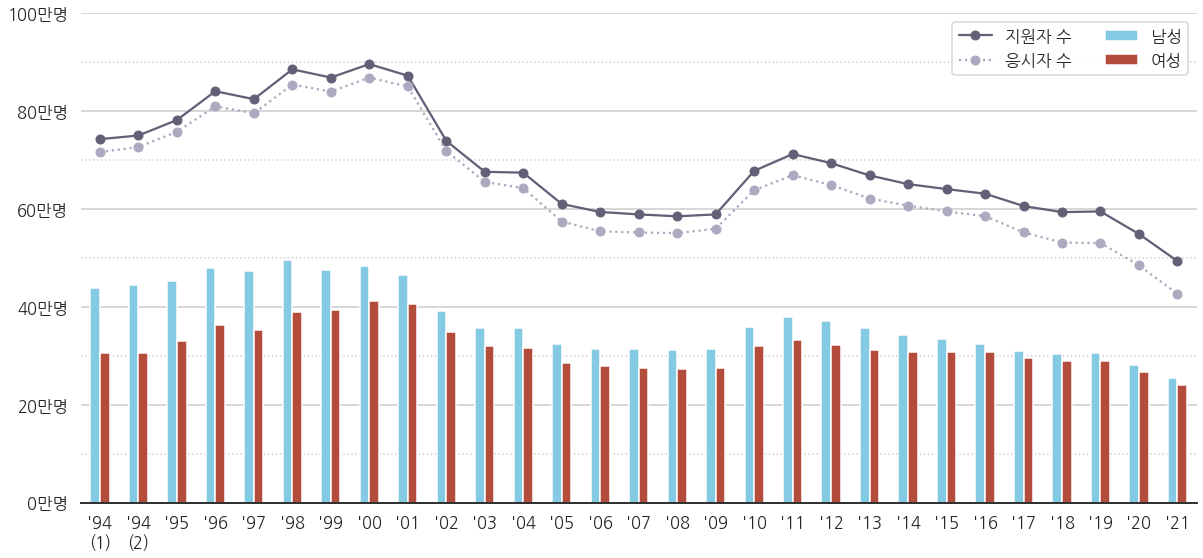

In [30]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"] # 범례 이름 변경
ax.legend(handles=handles, labels=labels)

ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2) # 범례 바꾸기

#### **4.1.3 범례 고치기(3): 2열 → 2행**

+ 나쁘지는 않은 것 같기도 합니다.
+ 성격이 다른 두 종류의 데이터를 **열**이 아니라 **행**으로 구분해보면 어떨까요?

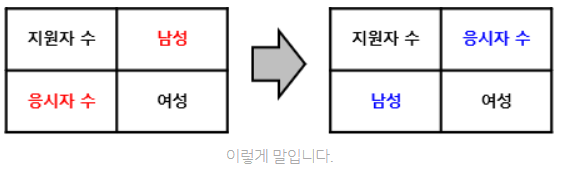  
+ 행렬의 열과 행을 바꾸는 과정과 동일합니다.

![](https://user-images.githubusercontent.com/72365693/105185572-013c6000-5b74-11eb-9db0-1619938316c8.PNG)

+ **numpy array의 transpose**를 쓰면 좋습니다.
+ handles와 labels를  
    **(1)np.array로 변환**하고,  
    **(2)(2,2)로 reshape**후,  
    **(3)transpose로 행과 열을 바꾸고**나서  
    **(4)다시 1차원으로 바꿔주면 됩니다.**

+ 설명은 복잡해 보이지만 코드는 한 줄로 가능합니다.

In [31]:
handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]

print(f"# handles = {np.array(handles).reshape(2,2).T.flatten()}")
print(f"# labels = {np.array(labels).reshape(2,2).T.flatten()}")

# handles = [<matplotlib.lines.Line2D object at 0x000002146D2EECD0>
 <BarContainer object of 29 artists>
 <BarContainer object of 29 artists>]
# labels = ['지원자 수' '남성' '응시자 수' '여성']


<ipython-input-31-422c879910dd>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  print(f"# handles = {np.array(handles).reshape(2,2).T.flatten()}")


+ 이제 그림에 적용해보면 이렇게 됩니다.

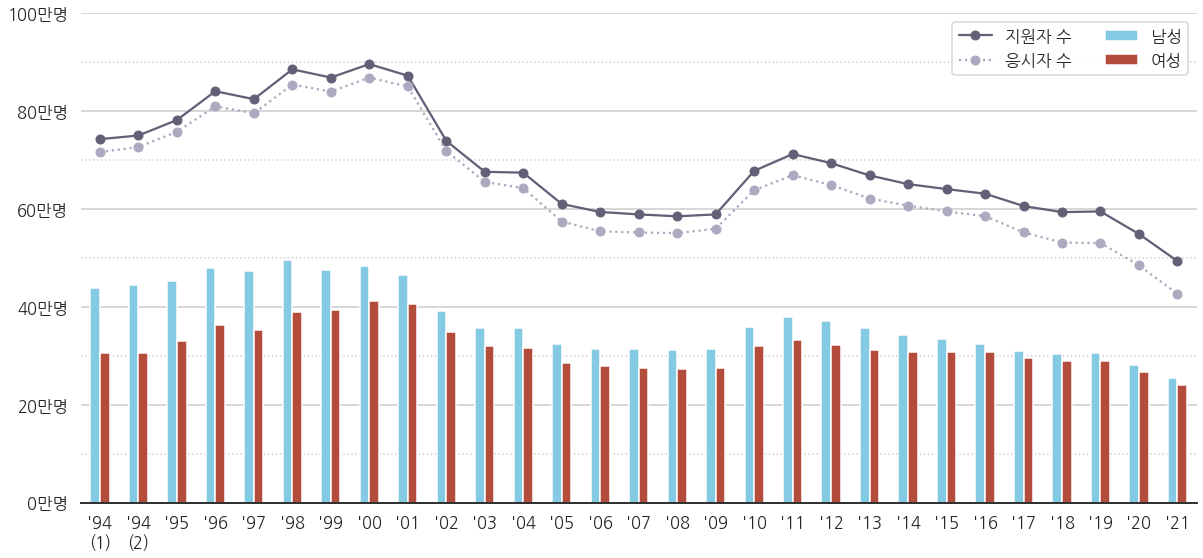

In [34]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"] # 범례 이름 변경
ax.legend(handles=handles, labels=labels)

ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2) # 범례 바꾸기


handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]

#### **4.1.4 범례 고치기(4):한 덩어리 → 두 덩어리**

+ legend가 여전히 마음에 들지 않습니다.
+ 아예 둘로 그냥 쪼개버리기로 합니다.
+ 앞에서 handles, labels로 legend를 제어할 수 있다는 것을 알았기 때문에, `ax.lengend()`**를 두 번 사용해서 따로따로 그리면** 될 것 같습니다.

+ 그러나 의외의 복병이 있습니다.
+ `ax.legend()`를 두 번째 수행하는 순간 **첫 번째 그린 legend가 자동으로 지워져** 버립니다.
+ **첫 번째 legend를 저장해 두었다가 두 번째 legend 생성 후 `add_artist()`로 붙이면 됩니다.**

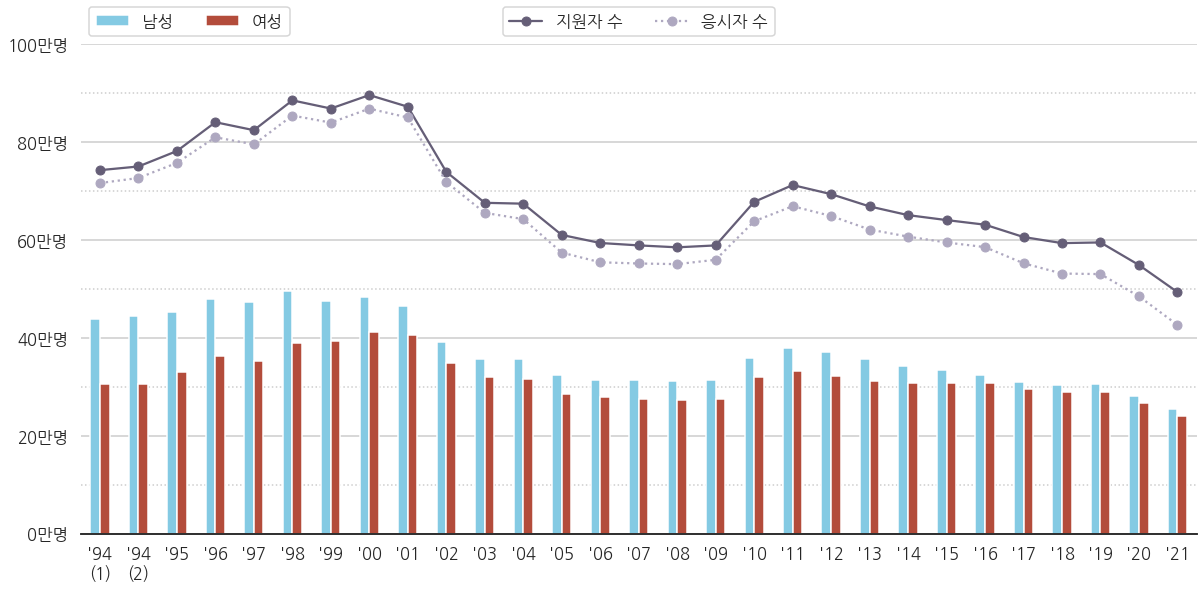

In [35]:
# major ticks와 minor ticks를 제어하기 위한 import
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

fig, ax = plt.subplots(figsize=(20, 9), sharey=True)

df_sn[["year", "num_M", "num_F"]].plot.bar(x="year", y=["num_M", "num_F"], ax=ax, 
                                           color={"num_M": color_M, "num_F": color_F})

ax.plot(df_sn["num_total"], 'o-', color=color_total, label="지원자 수")
ax.plot(df_sn["num_test"], 'o:', color=color_test, label="응시자 수")

ax.set_ylim(0, 1000000)

# yticks major/minor 설정
ax.yaxis.set_major_locator(MultipleLocator(200000))  # major는 20만명 단위
ax.yaxis.set_major_formatter('{x:.0f}')
ax.yaxis.set_minor_locator(MultipleLocator(100000))  # minor는 10만명 단위
ax.yaxis.set_minor_formatter('{x:.0f}')

# yticks: major
yticks = ax.get_yticks()
ax.set_yticks(yticks[1:-1])  # major ticks 범위가 무의미하게 넓어서 잘라줍니다.
yticklabels = ax.get_yticklabels()
ax.set_yticklabels([f"{y//10000:.0f}만명" for y in yticks[1:-1]])

# yticks: minor
#- get(set)_yticks, yticklabels에 minor=True를 넣으면 minor tick에 적용합니다.
#- 이 경우 major ticks에는 적용되지 않습니다.
yticks_minor = ax.get_yticks(minor=True) 
ax.set_yticks(yticks_minor[1:-1], minor=True) # minor ticks 범위도 잘라줍니다.
yticklabels = ax.get_yticklabels(minor=True)
# ax.set_yticklabels([f"{y//10000:.0f}만명 " for y in yticks_minor[1:-1]], minor=True)
ax.set_yticklabels([], minor=True)


xticks = ax.get_xticks()
ax.set_xticks(xticks)
xticklabels = [f"'{x.get_text()[2:]}" for x in ax.get_xticklabels()]
xticklabels[0] = xticklabels[0] + "\n(1)"
xticklabels[1] = xticklabels[1] + "\n(2)"
ax.set_xticklabels(xticklabels, rotation=0)

ax.set_xlabel("")

# spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# grid
ax.grid(axis="y", which="major")          # major grid. 기본 스타일 = 실선
ax.grid(axis="y", which="minor", ls=":")  # minor grid. 스타일 = 점선

ax.legend()

labels = labels[:2] + ["남성", "여성"] # 범례 이름 변경
ax.legend(handles=handles, labels=labels)

ax.legend(handles=handles, labels=labels, loc="upper right", ncol=2) # 범례 바꾸기


handles, labels = ax.get_legend_handles_labels()
labels = labels[:2] + ["남성", "여성"]


# legend (1) 남성, 여성
handles, labels = ax.get_legend_handles_labels()
legend0 = ax.legend(handles=handles[2:], labels=["남성", "여성"], ncol=2,
                    loc="lower left", bbox_to_anchor=(0, 1))

# legend (2) 지원자 수, 응시자 수
legend1 = ax.legend(handles=handles[:2], labels=labels[:2], ncol=2,
                    loc="lower center", bbox_to_anchor=(0.5, 1))
ax.add_artist(legend0)